In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In [4]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([ 0.89192017, -0.82181553, -0.19680161, -0.22324778,  0.59445294,
       -0.29125297,  0.30859225, -0.89400412, -0.3071137 ,  0.15876721])

In [5]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([ 0.1255936 , -0.5490912 , -0.14809445,  0.72666565,  0.31104496,
       -0.58678839, -0.2828259 , -0.52561253,  0.14543454, -0.2227523 ])

In [6]:
y = 0.3 * x1 + 0.5 * x2 + 0.1
y = y > 0.0

print(y.shape)
y[0:10]

(100,)


array([ True, False, False,  True,  True, False,  True, False,  True,  True], dtype=bool)

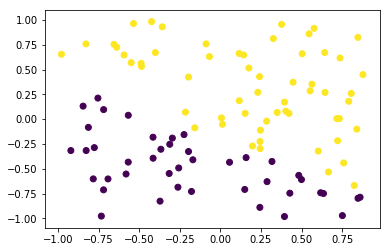

In [7]:
plt.scatter(x1, x2, c=y)

### Define Sigmoid

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

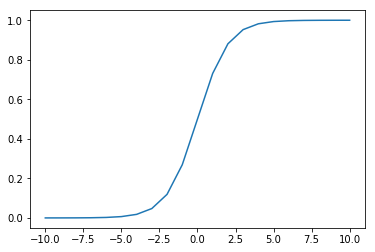

In [9]:
xx = np.linspace(-10, 10, num=21)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

In [9]:
num_epoch = 100
learning_rate = 1.0

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    y_predict = sigmoid(y_predict)
    
    predict = y_predict > 0.5
    error = (predict != y).mean()
    
    if epoch % 10 == 0:
        print("{0:2} error = {1:.6f}".format(epoch, error))
    
    if error < 0.03:
        break

    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()
    b = b - learning_rate * (y_predict - y).mean()

print("----" * 10)
print("w1 = {0:.6f}, w2 = {1:.6f} b = {2:.6f}".format(w1, w2, b))
print("{0:2} error = {1:.6f}".format(epoch, error))

 0 error = 0.120000
10 error = 0.020000
----------------------------------------
w1 = 1.332266, w2 = 1.811002 b = 0.523932
10 error = 0.020000


In [11]:
import pandas as pd

y_predict = w1 * x1 + w2 * x2 + b
y_predict = sigmoid(y_predict)
y_predict = y_predict > 0.5

result = pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': y_predict})

result

,x1,x2,y(actual),y(predict)
0,0.482938,-0.566886,False,False
1,-0.311872,-0.253336,False,False
2,0.644651,0.269319,True,True
3,-0.535232,0.963764,True,True
4,0.447791,0.372529,True,True
5,0.733150,0.005356,True,True
6,-0.733493,-0.977350,False,False
7,-0.366566,-0.303356,False,False
8,0.317870,-0.426786,False,False
9,-0.845874,0.131172,False,False
